In [1]:
from xpc3 import *
from xpc3_helper import *

In [31]:
import numpy as np

In [3]:
import pymap3d as pm

def set_position(client, ac, e, n, u, psi, pitch=-998, roll=-998):
    ref = [37.46358871459961, -122.11750030517578, 1578.909423828125]
    p = pm.enu2geodetic(e, n, u, ref[0], ref[1], ref[2])
    client.sendPOSI([*p, pitch, roll, psi], ac)

In [12]:
client = XPlaneConnect()
client.pauseSim(True)
client.sendDREF("sim/operation/override/override_joystick", 1)

In [16]:
set_position(client, 0, 0, 1000, 0, 0)

In [17]:
set_position(client, 1, 0, 1200, 10, 90, roll=0, pitch=0)

# Interactive Position

In [15]:
import ipywidgets as widgets
from ipywidgets import interact

In [20]:
def interact_position(e0, n0, u0, h0, e1, n1, u1, h1):
    set_position(client, 0, e0, n0, u0, h0)
    set_position(client, 1, e1, n1, u1, h1)

In [38]:
interact(interact_position,
         e0=widgets.FloatSlider(min=-5000.0, max=5000.0,
                                step=500, description='e0'),
         n0=widgets.FloatSlider(min=-5000.0, max=5000.0,
                                step=500, description='n0'),
         u0=widgets.FloatSlider(min=-500.0, max=500.0,
                                step=25, description='u0'),
         h0=widgets.FloatSlider(min=0.0, max=360.0, step=30, description='h0'),
         e1=widgets.FloatSlider(min=-2000.0, max=2000.0,
                                step=10, description='e1'),
         n1=widgets.FloatSlider(min=-2000.0, max=2000.0,
                                step=10, description='n1'),
         u1=widgets.FloatSlider(min=-300.0, max=300.0,
                                step=5, description='u1'),
         h1=widgets.FloatSlider(min=0.0, max=360.0, step=30, description='h1'))


interactive(children=(FloatSlider(value=0.0, description='e0', max=5000.0, min=-5000.0, step=500.0), FloatSlid…

<function __main__.interact_position(e0, n0, u0, h0, e1, n1, u1, h1)>

In [93]:
def sample_random_state():
    # Ownship state
    e0 = np.random.uniform(-5000.0, 5000.0) # m
    n0 = np.random.uniform(-5000.0, 5000.0) # m
    u0 = np.random.uniform(-500.0, 500.0) # m
    h0 = np.random.uniform(0.0, 360.0) # degrees

    # Info about relative position of intruder
    vang = np.random.uniform(-22.0, 22.0) # degrees
    hang = np.random.uniform(-36.0, 36.0) # degrees
    range = np.random.gamma(2, 200) # meters
    while range < 20.0:
        range = np.random.exponential(200.0)  # meters


    # print("vang: ", vang)
    # print("hang: ", hang)
    # print("range: ", range)

    # Intruder state
    e1 = e0 + np.sin((h0 + hang) * (np.pi / 180)) * range
    n1 = n0 + np.cos((h0 + hang) * (np.pi / 180)) * range
    u1 = u0 + np.sin(vang * (np.pi / 180)) * range
    h1 = np.random.uniform(0.0, 360.0)  # degrees

    return e0, n0, u0, h0, e1, n1, u1, h1


In [99]:
e0, n0, u0, h0, e1, n1, u1, h1 = sample_random_state()
interact_position(e0, n0, u0, h0, e1, n1, u1, h1)

vang:  -18.528386197763677
hang:  28.400955655285586
range:  262.09293210115794


# Screenshot Testing

In [100]:
from PIL import Image

import numpy as np
import time

import matplotlib.pyplot as plt

import mss
import cv2
import os

In [101]:
screenShot = mss.mss()


In [118]:
time.sleep(2)
ss1 = np.array(screenShot.grab(screenShot.monitors[0]))
ss = cv2.cvtColor(np.array(screenShot.grab(
    screenShot.monitors[0])), cv2.COLOR_BGRA2BGR)[:, :, ::-1]


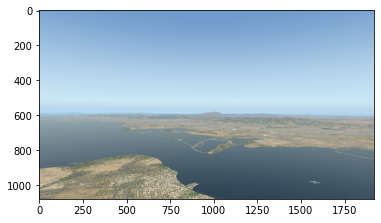

In [119]:
plt.imshow(ss)

In [122]:
cv2.imwrite('test.jpg', ss1)

True

In [123]:
jpg_im = cv2.imread('test.jpg')

In [124]:
png_im = cv2.imread('test.png')